# Background

We are use the following libraries to build, train and deploy our Theama image clearance models:

* [Keras](https://keras.io/): An open-source neural-network library written in Python
* [Tensorflow](https://www.tensorflow.or): An open-source software library for dataflow and differentiable programming
* [OpenCV](https://pypi.org/project/opencv-python/): A library of programming functions mainly aimed at real-time computer vision, originally developed by Intel,
* [Keras-OCR](https://pypi.org/project/keras-ocr/): A packaged and flexible version of the CRAFT text detector and Keras CRNN recognition model

Command to check GPU status: __watch -n 1 nvidia-smi__

# Keras OCR

A critical step in the image processing pipeline is "text detection", identifying whether text appears within a given image.

Quite a lot has changed over the last 6-12 months. The state of the art used to be YOLOv2. At present there are multiple open source projects available for text detection.  The following has proved quite effective in processing large quatities of images.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from keras.preprocessing import image
from PIL import Image
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

try:
    import tensorflow
except ModuleNotFoundError:
    !pip install tensorflow==2.0
    import tensorflow

try:
    import keras_ocr
except ModuleNotFoundError:
    !pip install keras-ocr
    import keras_ocr

import time
import os

import matplotlib.pyplot as plt
%matplotlib inline

/home/jupyter/keras_lab/lib/python3.7/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
Using TensorFlow backend.


In [2]:
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /home/jupyter/.keras-ocr/craft_mlt_25k.h5
Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.
Looking for /home/jupyter/.keras-ocr/crnn_kurapan.h5


## Single Image from file
In the typical use case we would want to scan a variety of images. This would be done by providing all the images as a list of arrays.  However, we may also want to test with just a sinlge image and these following examples demonstrate how to accomplish this task. 

Keras_OCR presumes the input is from a pipeline and expects lists as an input. Things get very 'mucky' if you forget that when attempting to scan a single image.



**********************
* Process Time: 0sec *
**********************


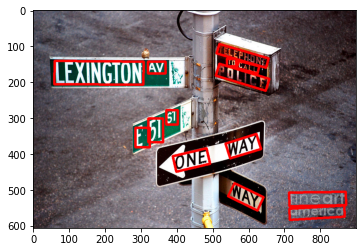

In [9]:
files = ['images//new-york-city-street-signs.jpeg']

# Get a set of three example images
image_list = [keras_ocr.tools.read(file) for file in files]

start = time.time()
prediction_groups = pipeline.recognize(image_list)
stop = time.time()

output = '* Process Time: ' + str(int(stop - start)) + 'sec *'
divider = '*' * len(output)
                 
print('\n')
print(divider)
print(output)
print(divider)

image = image_list[0]
prediction = prediction_groups[0]

drawn = keras_ocr.tools.drawBoxes(image=image, 
                                  boxes=prediction, 
                                  boxes_format='predictions'
                                 )

plt.imshow(drawn)

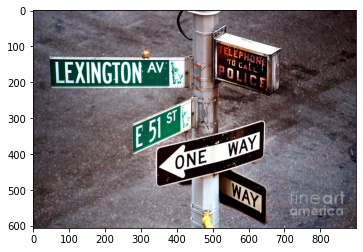

In [4]:
plt.imshow(image)

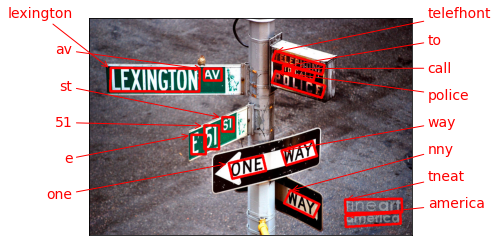

In [5]:
keras_ocr.tools.drawAnnotations(image=image, predictions=prediction)

## Multiple Images from file
Keras_OCR presumes the input is from a pipeline and expects lists as an input. Things get very 'mucky' if you forget that when attempting to scan a single image.

In [10]:
start = time.time()
files = ['images//'+file for file in os.listdir('images') if file != '.ipynb_checkpoints']
         
# Get a set of example images
image_list = [keras_ocr.tools.read(file) for file in files]

# Each list of predictions in prediction_groups is a list of
# (word, box) tuples.

prediction_groups = pipeline.recognize(image_list)

stop = time.time()

output = '* Process Time: ' + str(int(stop - start)) + 'sec *'
divider = '*' * len(output)
print(divider)
print(output)
print(divider)

***********************
* Process Time: 19sec *
***********************


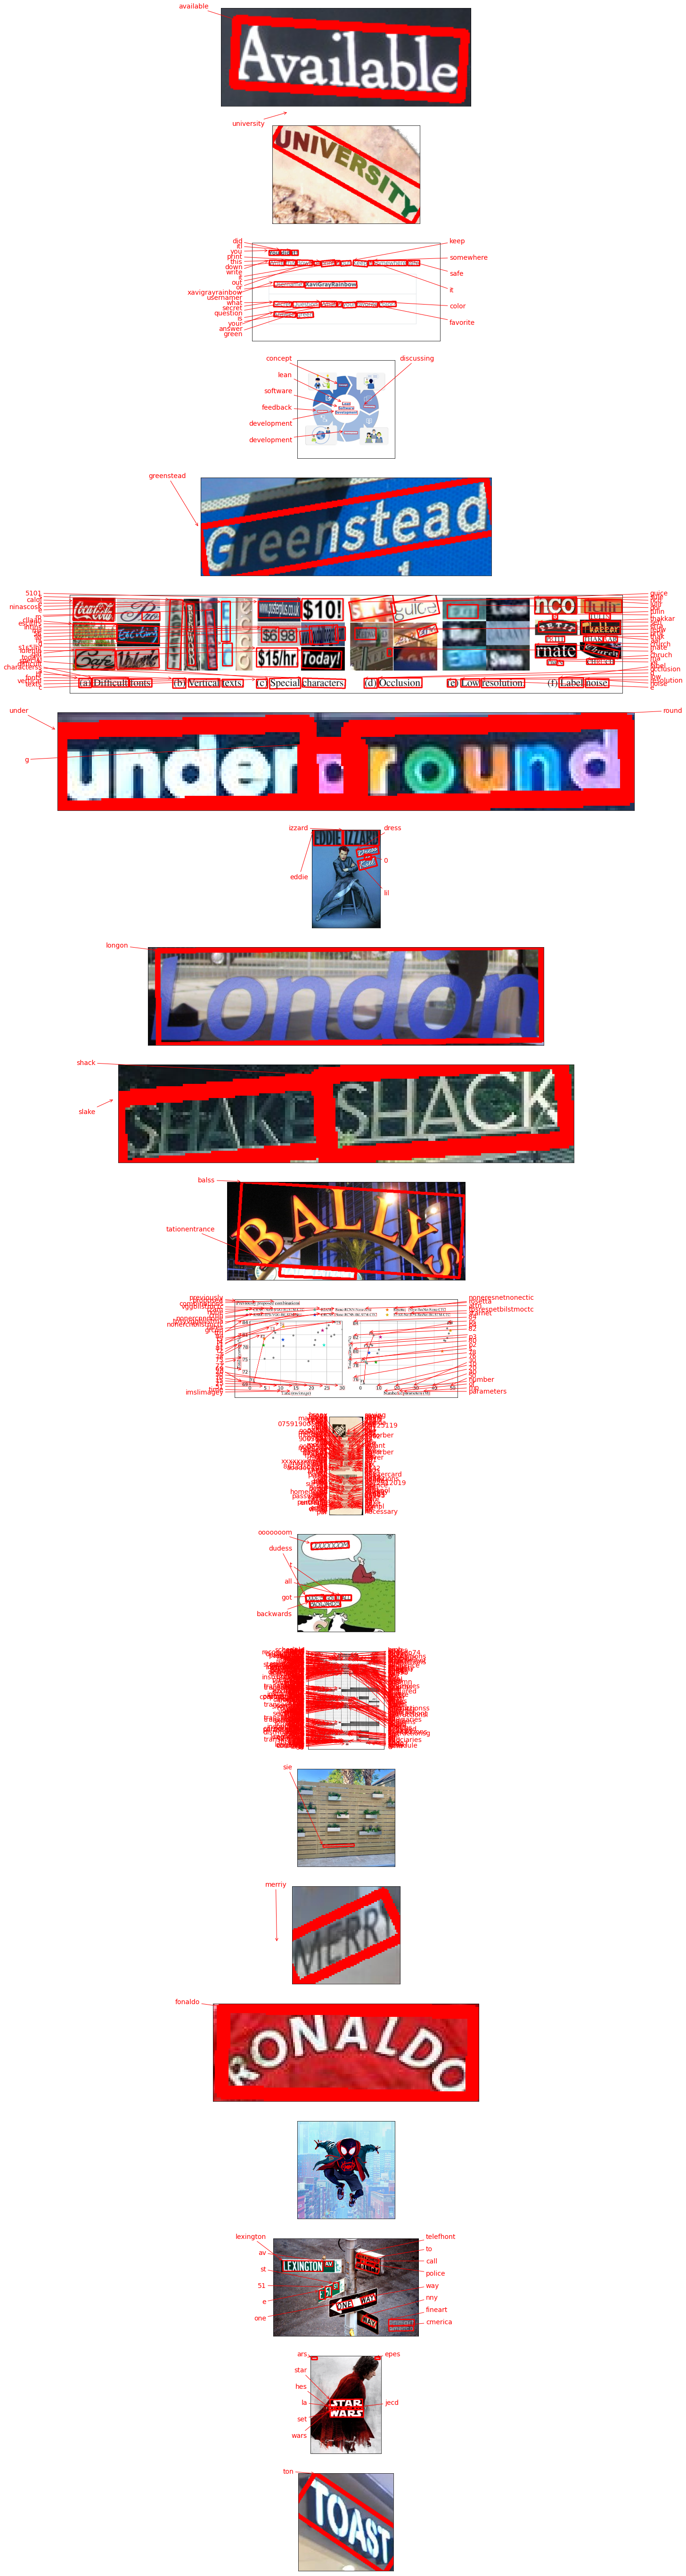

In [11]:
# Plot the predictions
fig, axs = plt.subplots(nrows=len(image_list), figsize=(100, 100))
for ax, image, predictions in zip(axs, image_list, prediction_groups):
    keras_ocr.tools.drawAnnotations(image=image, predictions=predictions, ax=ax)

## Multiple URL Images
Reviewing multiple URLs in a list.

**********************
* Process Time: 4sec *
**********************


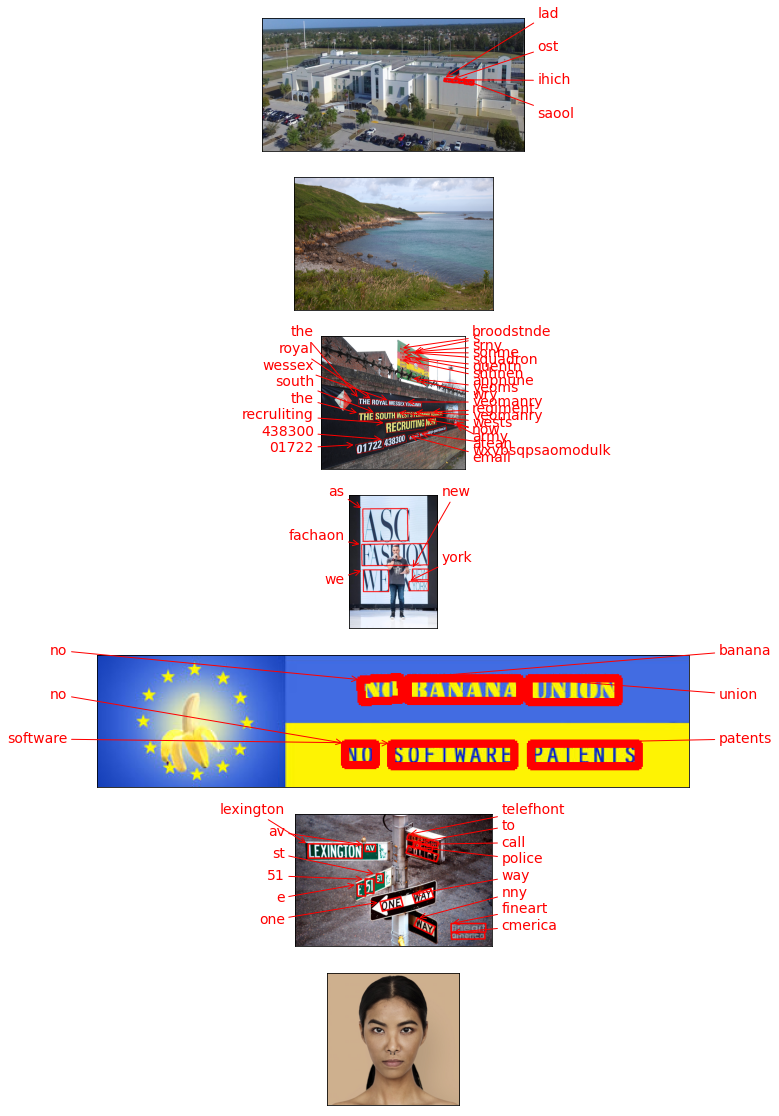

In [12]:
urls = ['https://p18cdn4static.sharpschool.com/userfiles/servers/server_695230/image/school%20pic%20sized1.jpg',
        'https://upload.wikimedia.org/wikipedia/commons/b/ba/Herm_Island_Coast.jpg',
        'https://upload.wikimedia.org/wikipedia/commons/b/bd/Army_Reserves_Recruitment_Banner_MOD_45156284.jpg',
        'https://upload.wikimedia.org/wikipedia/commons/e/e8/FseeG2QeLXo.jpg',
        'https://upload.wikimedia.org/wikipedia/commons/b/b4/EUBanana-500x112.jpg',
        'https://images.fineartamerica.com/images/artworkimages/mediumlarge/1/new-york-city-street-signs-lexington-av-and-e-51-st-carlos-alkmin.jpg',
        'https://img.rawpixel.com/s3fs-private/rawpixel_images/website_content/k-s35-ake-tong-04613123skin.jpg?w=800&dpr=1&fit=default&crop=default&auto=format&fm=pjpg&q=75&vib=3&con=3&usm=15&bg=F4F4F3&ixlib=js-2.2.1&s=396db1ea0c5d693af079dfb6cb4738eb'
       ]

# Get a set of three example images
images = [keras_ocr.tools.read(url) for url in urls]

# Each list of predictions in prediction_groups is a list of
# (word, box) tuples.

start = time.time()

prediction_groups = pipeline.recognize(images)

stop = time.time()

output = '* Process Time: ' + str(int(stop - start)) + 'sec *'
divider = '*' * len(output)
print(divider)
print(output)
print(divider)

# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
for ax, image, predictions in zip(axs, images, prediction_groups):
    keras_ocr.tools.drawAnnotations(image=image, predictions=predictions, ax=ax)

# Next Steps

* Explore multithreading for concurrency
* Measure performance on different hardware